# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,3.50,5.36,6.38,6.13,6.99,7.46,7.61,7.01,6.71,7.12,6.72,6.21,5.44,5.54
max_closed_out_drawdown,-18.25,-16.99,-15.78,-14.04,-14.02,-14.63,-15.79,-15.38,-15.00,-14.97,-16.57,-18.13,-17.34,-17.39
drawdown_annualized_return,-5.22,-3.17,-2.47,-2.29,-2.00,-1.96,-2.07,-2.19,-2.24,-2.10,-2.47,-2.92,-3.18,-3.14
drawdown_recovery,-0.91,-0.91,-0.05,-0.05,-0.05,-1.84,-1.84,-1.66,-1.66,-1.66,-0.05,-1.28,-0.19,-0.19
best_month,8.75,12.09,11.04,10.05,10.05,12.88,12.85,13.27,10.71,11.05,10.72,10.72,10.71,11.35
worst_month,-13.74,-15.62,-15.29,-13.55,-13.53,-13.54,-12.29,-13.73,-13.72,-13.70,-16.28,-16.28,-13.97,-14.03
sharpe_ratio,0.43,0.60,0.71,0.68,0.76,0.78,0.80,0.76,0.73,0.77,0.71,0.66,0.59,0.61
sortino_ratio,0.31,0.43,0.51,0.49,0.55,0.58,0.59,0.55,0.53,0.55,0.50,0.47,0.41,0.42
monthly_std,2.08,2.10,1.95,1.93,1.95,2.08,2.12,2.03,2.01,2.02,2.05,2.11,2.01,1.96
pct_time_in_market,33.80,31.62,30.91,30.16,29.49,30.04,29.45,28.10,28.34,28.07,27.91,28.00,27.11,26.07


Bar graphs

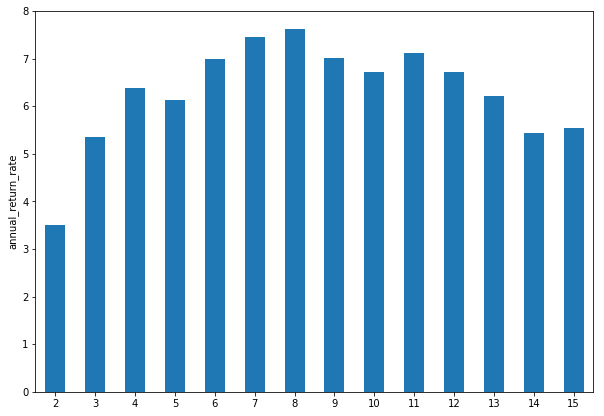

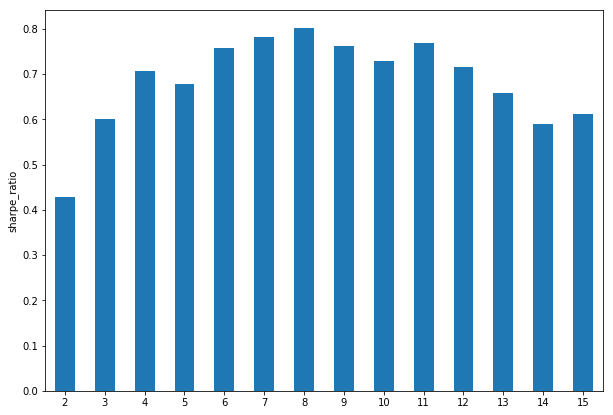

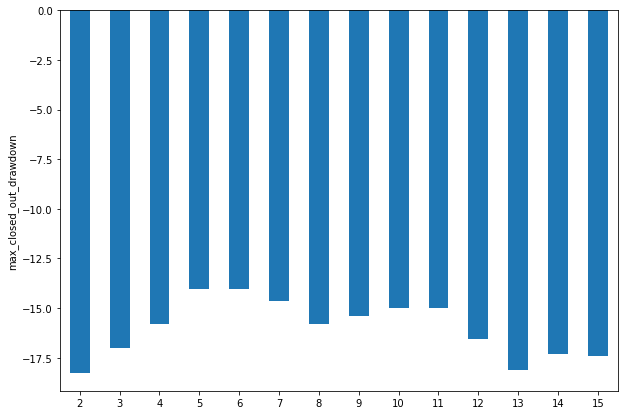

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2019-12-19 00:00:00 SELL 215 SPY @ 320.90


Equity curve

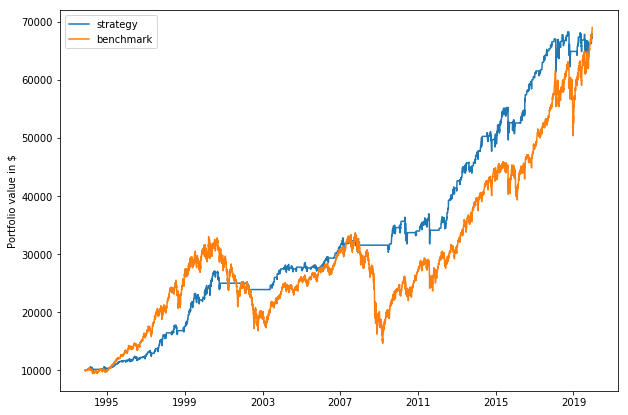

In [9]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)